In [2]:
import numpy as np
import pandas as pd

import pylab as plt
import seaborn as sns

from scipy import stats
from statannot import add_stat_annotation
#import pingouin as pg

import datetime
import matplotlib.dates as mdates
import re

from importlib import reload
import sys
import os
sys.path.insert(1,'../')
import plots

In [41]:
7/10, 8/12, 2/10, 3/12

(0.7, 0.6666666666666666, 0.2, 0.25)

In [3]:
reload(plots)
image_path = plots.set_dir()
colors = plots.set_colors()

/tmp/ipykernel_235507/340336646.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes['mid'].set_xticklabels(xnames,rotation=90);


Dystonia Healthy Prodromal
Dystonia Prodromal Diagnosed


/scratch/c.c21013066/docker/envs/pythonstats/lib/python3.9/site-packages/pingouin/parametric.py:252: RuntimeWarning: Degrees of freedom <= 0 for slice
  vx, vy = x.var(ddof=1), y.var(ddof=1)
/scratch/c.c21013066/docker/envs/pythonstats/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/scratch/c.c21013066/docker/envs/pythonstats/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


p-value annotation legend:
ns: 2.38e-03 < p <= 1.00e+00
*: 2.00e-04 < p <= 2.38e-03
**: 2.00e-05 < p <= 2.00e-04
***: 2.00e-06 < p <= 2.00e-05
****: p <= 2.00e-06

ParkinsonDisease_Healthy v.s. ParkinsonDisease_Prodromal: t-test independent samples, P_val=1.303e-08 stat=5.687e+00
ParkinsonDisease_Healthy v.s. ParkinsonDisease_Diagnosed: t-test independent samples, P_val=4.174e-10 stat=6.249e+00
Depression_Healthy v.s. Depression_Diagnosed: t-test independent samples, P_val=8.657e-19 stat=8.855e+00


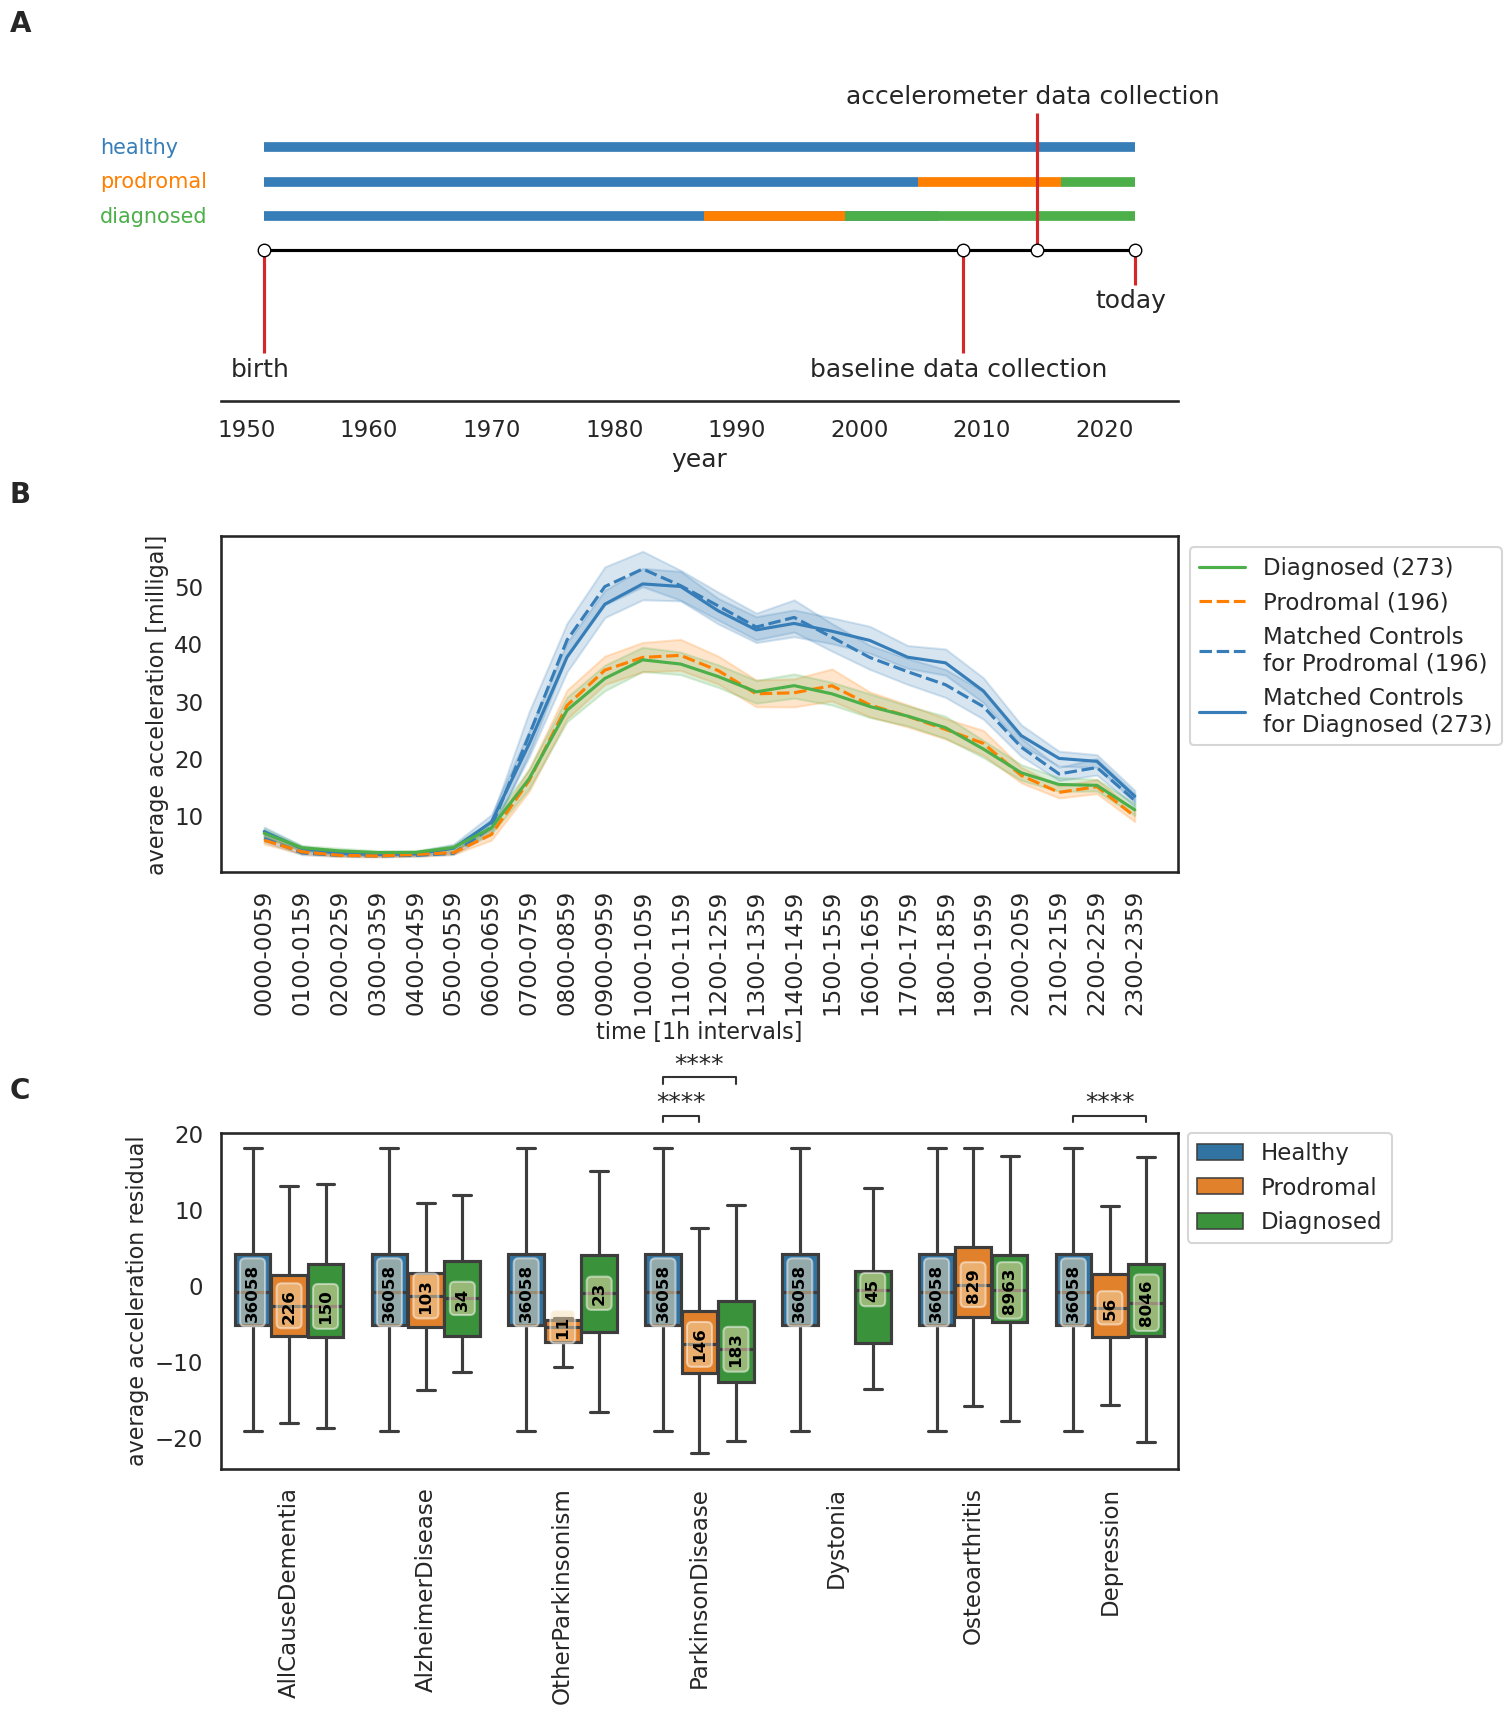

In [17]:
# Create figure and plot a stem plot with the date
#fig, axes = plt.subplot_mosaic(
#    [["top", "top",'top'],['mid','mid','mid'],['low1','low2','low2']],figsize=(15, 17), constrained_layout=True)
fig, axes = plt.subplot_mosaic(
   [["top"],['mid'],['low2']],figsize=(15, 17), constrained_layout=True)
plots.plot_context()
sns.set_style('white')

# schematic figure group definitions
names = ['birth','baseline data collection','accelerometer data collection','today']
dates = [0,57,62.5,89]
dates = pd.to_datetime(['1951-06-15','2008-06-15','2014-06-15','2022-6-15'])
# Choose some nice levels
levels = np.tile([-3, -3, 4, -1, 2],
                 int(np.ceil(len(dates)/6)))[:len(dates)]
axes['top'].hlines(3, dates[0],dates[-1],color=colors.healthy,linewidths=7)
axes['top'].text(dates[0]-datetime.timedelta(weeks=700),3,'healthy',ha='left',va='center',fontsize=15,color=colors.healthy)
#ax.hlines(1, 62.58,100,color="tab:green",linewidths=7)  # prevalent
axes['top'].hlines(1, dates[0],dates[1]-datetime.timedelta(weeks=104),color=colors.healthy,linewidths=7)
axes['top'].hlines(1, dates[1]-datetime.timedelta(weeks=1104),dates[1]-datetime.timedelta(weeks=504),color=colors.prodromal,linewidths=7) 
axes['top'].hlines(1, dates[1]-datetime.timedelta(weeks=504),dates[-1],color=colors.diseased,linewidths=7) 
axes['top'].text(dates[0]-datetime.timedelta(weeks=700),1,'diagnosed',ha='left',va='center',fontsize=15,color=colors.diseased)

#ax.hlines(2, 73.58,100,color="tab:orange",linewidths=7) # incident
axes['top'].hlines(2, dates[0],dates[2]-datetime.timedelta(weeks=504),color=colors.healthy,linewidths=7)
axes['top'].hlines(2, dates[2]-datetime.timedelta(weeks=504),dates[2]+datetime.timedelta(weeks=104),color=colors.prodromal,linewidths=7)
axes['top'].hlines(2, dates[2]+datetime.timedelta(weeks=104),dates[-1],color=colors.diseased,linewidths=7)
axes['top'].text(dates[0]-datetime.timedelta(weeks=700),2,'prodromal',ha='left',va='center',fontsize=15,color=colors.prodromal)
#ax.vlines(70.3, -3, 4, color="k",linestyle='--')  # The vertical stems.
axes['top'].vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
axes['top'].plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.
# annotate lines
for d, l, r in zip(dates, levels, names):
    axes['top'].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
#ax.set_xticklabels(dates_labels)
plt.setp(axes['top'].get_xticklabels(), rotation=0, ha="center")

# remove y axis and spines
axes['top'].yaxis.set_visible(False)
#ax.xaxis.set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False)
axes['top'].spines['top'].set_visible(False)
axes['top'].spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
axes['top'].spines['left'].set_visible(False)
axes['top'].set_xlabel('year',fontsize=18)
axes['top'].margins(y=0.2)
axes['top'].text(-0.22, 1.1,"A", transform=axes['top'].transAxes,size=20, weight='bold')

# figure 2
data_path = '/scratch/c.c21013066/data/ukbiobank/phenotypes/accelerometer/'
name = 'ParkinsonDisease'
matched = 'matched'
dfs_new = pd.read_csv(f'{data_path}matched_all_HCnoOsteo.csv',index_col=0)
matched_sample = dfs_new[dfs_new['diagnosis']==name]
time_matched = matched_sample[np.hstack([name,'diagnosis','diagnosis_prod','diagnosis_prod_conservative','Group',matched_sample.filter(regex='Average').columns,'visit_age',f'{name}_age','time_to_diagnosis','accelerometry_age','acc_time_since_diagnosis'])]
time_matched = time_matched.melt(id_vars=[name,'accelerometry_age','time_to_diagnosis','acc_time_since_diagnosis','diagnosis','diagnosis_prod','diagnosis_prod_conservative',f'{name}_age','Group'],
                             value_vars=matched_sample.filter(regex='Average').columns)
time_matched['match'] = time_matched['Group'].replace(['Prodromal','Diseased','Healthy_Prodromal','Healthy_Diseased'],
                                              ['prodromal','diseased','prodromal','diseased'])
time_matched['status'] = time_matched['Group'].replace(['Prodromal','Diseased','Healthy_Prodromal','Healthy_Diseased'],
                                              ['prodromal','diseased','healthy','healthy'])
xnames = matched_sample.filter(regex='Average').columns.str.replace('Average','').str.replace('___','-')
labels = time_matched['Group'].value_counts()//len(xnames)
pvals = pd.DataFrame(columns=['t','pvalue'],index=pd.MultiIndex.from_product([['diagHC','prodHC'],np.unique(time_matched['variable'])],names=['group','hour']))
for hour in np.unique(time_matched['variable']):
    dat = time_matched[time_matched['variable']==hour]
    t,p = stats.ttest_ind(dat.loc[dat['Group']=='Healthy_Diseased','value'],dat.loc[dat['Group']=='Diseased','value'])
    pvals.loc[('diagHC',hour),'t'] = t
    pvals.loc[('diagHC',hour),'pvalue'] = p
    t,p = stats.ttest_ind(dat.loc[dat['Group']=='Healthy_Prodromal','value'],dat.loc[dat['Group']=='Prodromal','value'])
    pvals.loc[('prodHC',hour),'t'] = t
    pvals.loc[('prodHC',hour),'pvalue'] = p
# save for supplemental Table
#pvals.to_csv(f'{data_path}rawdaytime_Parkinson_pvals_HCnoOsteo.csv')
axes['mid'] = sns.lineplot(x='variable',y='value',data=time_matched,hue='status',palette=colors.palette[:3],hue_order=['healthy','prodromal','diseased'],
                 style='match',style_order=['diseased','prodromal'],ax=axes['mid'])
prod = labels["Prodromal"]
axes['mid'].legend(handles=axes['mid'].lines[:4][::-1], labels=[f"Matched Controls \nfor Diagnosed ({labels['Healthy_Diseased']})",
                                    f"Matched Controls \nfor Prodromal ({labels['Healthy_Prodromal']})",
                                    f"Prodromal ({prod})",
                                    f"Diagnosed ({labels['Diseased']})"
                                        ][::-1],bbox_to_anchor=[1,1])
axes['mid'].set_xticklabels(xnames,rotation=90);
axes['mid'].set_xlabel('time [1h intervals]')
axes['mid'].set_ylabel('average acceleration [milligal]');
#axes[1].subplots_adjust(bottom=0.1)
axes['mid'].text(-0.22, 1.1,"B", transform=axes['mid'].transAxes,size=20, weight='bold')

# # figure 3
subset = ['AllCauseDementia','AlzheimerDisease','AllCauseParkinsonism','ParkinsonDisease','Dystonia',
           'Osteoarthritis','Depression']
# dfs_new = pd.read_csv(f'{data_path}matched_all.csv',index_col=0)
# cooccurances = pd.DataFrame(columns=subset,index=subset)
# for disease in subset:
#     for codisease in subset:
#         d1 = set(dfs_new.loc[np.logical_and(dfs_new['diagnosis']==disease,dfs_new['Status'].isin(['Prodromal','Diseased']))].index.values)
#         d2 = set(dfs_new.loc[np.logical_and(dfs_new['diagnosis']==codisease,dfs_new['Status'].isin(['Prodromal','Diseased']))].index.values)
#         cooccurances.loc[disease,codisease] = len(d1.intersection(d2))
# norm = (cooccurances / np.diag(cooccurances))*100
# hm = sns.heatmap(norm.astype(float),cbar_kws={'label': 'overlap [%]','fraction':0.1,
#                                              'orientation':"horizontal"},annot=True,ax=axes['low1'],
#                 annot_kws={"fontsize":9},fmt='.1f')
# axes['low1'].text(-0.22, 1.1,'C', transform=axes['low1'].transAxes, 
#             size=20, weight='bold')
# axes['low1'].set(adjustable='box', aspect='equal')
# #axes[2].set_anchor('W')

#figure 4
data_path = '/scratch/c.c21013066/data/ukbiobank/phenotypes/accelerometer/'
df = pd.read_csv(f'{data_path}/unmatched_all_NoDepressedNoPD_residual_BMI_HCnoOsteo_intercept.csv',
                      index_col=0)
hc = pd.read_csv(f'{data_path}/HCnoOsteo_residuals_bmi_intercept.csv',
                      index_col=0)

data = df[df['diagnosis'].isin(subset)]
data['Status'] = data['Status'].replace(['Diseased'],['Diagnosed'])
y = 'average acceleration residual_bmi'
# get all HC
hc = hc.dropna(subset=[y],axis='rows',how='any')
hc['Status'] = 'Healthy'
data=data[data['Status']!='Healthy']
for diagnosis in subset:
    hc['diagnosis'] = diagnosis
    data = pd.concat([data,hc])
thresh = 0.05/(len(subset)*3)
annot = [[2e-6, "****"], [2e-5, "***"], [2e-4, "**"], [thresh, "*"], [1, "ns"]]
box_pairs = []
ttests = []
statistics = pd.DataFrame(columns=pd.MultiIndex.from_product([['T','dof','alternative','p-value','CI95%',
                                                               'cohen-d','BF10','power'],subset],
                                                             names = ['statistic','disorder']),
                                               index=pd.MultiIndex.from_product([['Healthy','Prodromal','Diagnosed'],
                                                           ['Healthy','Prodromal','Diagnosed']],
                                                          names = ['g1','g2']))
for diagnosis in subset:
    diag = data[data['diagnosis']==diagnosis]
    ttest = pd.DataFrame(index=pd.MultiIndex.from_product([['Healthy','Prodromal','Diagnosed'],
                                                           ['Healthy','Prodromal','Diagnosed']],
                                                          names = ['g1','g2']),columns=['t','p'])
    for i,g1 in enumerate(['Healthy','Prodromal','Diagnosed']):
        for j,g2 in enumerate(['Healthy','Prodromal','Diagnosed']):
            if j>i:
                try:
                    if g1=='Healthy':
                        statistics.loc[(g1,g2),(slice(None),diagnosis)] = pg.ttest(hc[y],diag.loc[diag['Status']==g2,y],correction=False).values
                        t,p = stats.ttest_ind(hc[y],diag.loc[diag['Status']==g2,y],equal_var=np.logical_or(g1=='Healthy',g2=='Healthy'))
                    elif g2=='Healthy':
                        t,p = stats.ttest_ind(diag.loc[diag['Status']==g1,y],hc[y],equal_var=np.logical_or(g1=='Healthy',g2=='Healthy'))
                        statistics.loc[(g1,g2),(slice(None),diagnosis)] = pg.ttest(diag.loc[diag['Status']==g1,y],hc[y],correction=np.logical_or(g1=='Healthy',g2=='Healthy')).values
                    else:
                        t,p = stats.ttest_ind(diag.loc[diag['Status']==g1,y],diag.loc[diag['Status']==g2,y],equal_var=np.logical_or(g1=='Healthy',g2=='Healthy'))
                        statistics.loc[(g1,g2),(slice(None),diagnosis)] = pg.ttest(diag.loc[diag['Status']==g1,y],
                                                                                    diag.loc[diag['Status']==g2,y],correction=np.logical_or(g1=='Healthy',g2=='Healthy')).values
                    ttest.loc[(g1,g2),'t'] = t
                    ttest.loc[(g1,g2),'p'] = p
                except:
                    print(diagnosis,g1,g2)
    ttest = ttest.dropna(axis='rows',how='all')
    sign = ttest[ttest['p']<thresh]
    for key,row in sign.iterrows():
        box_pairs.append(((diagnosis,key[0]),(diagnosis,key[1])))
    if y=='average acceleration residual_bmi':
        ttests.append(ttest)
statistics = statistics.dropna(axis='rows',how='all')
statistics.to_csv('/scratch/c.c21013066/data/ukbiobank/phenotypes/accelerometer/group_differences_averageacc_HCnoOsteo_intercept.csv')
N_diagnosis = data.dropna(subset=[y]).groupby(['diagnosis','Status']).size()
N_diagnosis = N_diagnosis.loc[(subset,['Healthy','Prodromal','Diagnosed'])]
bp = sns.boxplot(y=y,hue='Status',x='diagnosis',data=data,hue_order=['Healthy','Prodromal','Diagnosed'],
                 showfliers=False,
                order=subset,ax=axes['low2'])
bp, test_results = add_stat_annotation(axes['low2'], data=data, x='diagnosis', y=y, hue='Status',
                                       hue_order=['Healthy','Prodromal','Diagnosed'],
                                       order=subset,
                                   box_pairs=box_pairs,
                                   test='t-test_ind', text_format='star', loc='outside', verbose=2,
                                       comparisons_correction=None,
                                      pvalue_thresholds=annot)
axes['low2'].set_ylabel('average acceleration residual')
axes['low2'].set_xlabel('')
axes['low2'].text(-0.22, 1.1,'C', transform=axes['low2'].transAxes, 
            size=20, weight='bold')
axes['low2'].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);
axes['low2'].set_xticklabels(['AllCauseDementia','AlzheimerDisease','OtherParkinsonism','ParkinsonDisease','Dystonia',
                         'Osteoarthritis','Depression'],rotation=90)
plots.add_median_labels(axes['low2'],N_diagnosis,fmt="%d",remove=len(box_pairs))

#plt.tight_layout()
plt.savefig(f'{image_path}/Fig2_HCnoOsteo_intercept.pdf',bbox_inches='tight',dpi=300,transparent=True)
plt.savefig(f'{image_path}/Fig2_HCnoOsteo_intercept.png',bbox_inches='tight',dpi=300,transparent=True)

In [15]:
statistics['p-value']

disorder                   AllCauseDementia      AlzheimerDisease  \
g1        g2                                                        
Healthy   Prodromal  [0.035275635606369544]  [0.4672444397365425]   
          Diagnosed    [0.1723036354805145]  [0.7781419150150168]   
Prodromal Diagnosed    [0.5774349765262208]  [0.8100086310794252]   

disorder             AllCauseParkinsonism          ParkinsonDisease  \
g1        g2                                                          
Healthy   Prodromal  [0.2700338739135035]  [1.3032518689422877e-08]   
          Diagnosed  [0.8501002698777785]  [4.1744297008365035e-10]   
Prodromal Diagnosed  [0.0983144639004843]      [0.8795734033251686]   

disorder                        Dystonia         Osteoarthritis  \
g1        g2                                                      
Healthy   Prodromal                  NaN  [0.11684189486634909]   
          Diagnosed  [0.481626976770571]  [0.48260204167346954]   
Prodromal Diagnosed                  NaN   [0.1380116505101401]   

disorder                          Depression  
g1        g2                                  
Healthy   Prodromal    [0.29554187275485233]  
          Diagnosed  [8.656893102549473e-19]  
Prodromal Diagnosed     [0.5914819364052543]

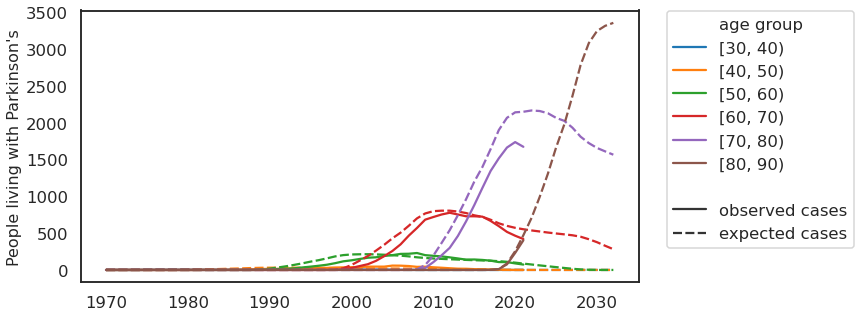

In [4]:
data_path = '/scratch/c.c21013066/data/ukbiobank/sample/withGP/noOsteo/IncidencePrevalence'
name = 'ParkinsonDisease'
prevalence_age = pd.read_csv(f'{data_path}/Prevalence_ParkinsonDisease.csv',index_col=0,parse_dates=[f'{name}_date'])
expected_prev_year_all = pd.read_csv(f'{data_path}/expected_prevalence_ParkinsonDisease.csv',index_col=0,
                                     parse_dates=[f'{name}_date'])
prev_year_all = pd.read_csv(f'{data_path}/observed_prevalenceParkinsonDisease.csv',index_col=0,
                            parse_dates=[f'{name}_date'])
prevalence_age = prevalence_age.rename(columns={'ParkinsonDisease_agegroup':'age group','kind':' '})
prevalence_age[' '] = prevalence_age[' '].replace(['cases_observed','cases_expected'],
                                                  ['observed cases','expected cases'])
                                                                                                            
fig = plt.figure(figsize=(10,5))
plots.plot_context()
sns.lineplot(x=f'{name}_date',y='cases',hue=f'age group',data=prevalence_age,style=' ');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("People living with Parkinson's")
plt.xlabel('')
plt.savefig(f'{image_path}/Fig1_HCnoOsteo.pdf',dpi=300,bbox_inches='tight')
plt.savefig(f'{image_path}/Fig1_HCnoOsteo.png',dpi=300,bbox_inches='tight')

In [12]:
data_path = '/scratch/c.c21013066/data/ukbiobank/analyses/acc_models/noOsteo'
models = ['diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDallHC','diag_ProdallHC','diag_PDProdallHC','diag_PDPopulationNoProd','diag_ProdPopulationNoPD',
          'diag_PDProdPopulation']
models0 = ['diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDPopulationNoProd','diag_ProdPopulationNoPD',
          'diag_PDProdPopulation']
kinds = ['HC','HC','HC','allHC','allHC','allHC','pop','pop','pop']
features = ['intercept','covariates','PRS','genetics+family','lifestyle_nofam','blood','prodromalsigns_beforePD','acc','all_acc_features',
            'genetics+family+all_acc_features','lifestyle+all_acc_features','blood+all_acc_features','prodromalsigns_beforePD+all_acc_features',
            'all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD']
stacked_features = ['genetics+family+all_acc_features','lifestyle+all_acc_features','blood+all_acc_features','prodromalsigns_beforePD+all_acc_features',
            'all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD']
stacked_features_names = [f'{n}_stacked' for n in stacked_features]

performances = pd.DataFrame(index=pd.MultiIndex.from_product([models,np.hstack([features,stacked_features_names])],names=['model','features']),
                            columns=np.arange(5))
performances_pr = pd.DataFrame(index=pd.MultiIndex.from_product([models,np.hstack([features,stacked_features_names])],names=['model','features']),
                               columns=np.arange(5))
curves = pd.DataFrame(index=pd.MultiIndex.from_product([models,np.hstack([features,stacked_features_names])],names=['model','features']),
                               columns=pd.MultiIndex.from_product([['tpr','fpr','precision','recall'],np.arange(5)],names=['metric','cv']))

for kind,modelname,model in zip(kinds,models,models0):
    for i,feature in enumerate(np.hstack([stacked_features_names,features])):
        if 'stacked' in feature:
            name = modelname.replace('diag_','')
            fname = stacked_features[i]
            stacked = pd.read_csv(f'{data_path}/{fname}/stacked_perf.csv',index_col=[0,1],header=[0,1])
            stacked = stacked['test']
            performances.loc[(modelname,feature),:] = stacked.loc[name,'AUROC'].dropna().values
            performances_pr.loc[(modelname,feature),:] = stacked.loc[name,'AUPRC'].dropna().values
            curves.loc[(modelname,feature),('fpr',slice(None))] = stacked.loc[name,'fpr'].dropna().values
            curves.loc[(modelname,feature),('tpr',slice(None))] = stacked.loc[name,'tpr'].dropna().values
            curves.loc[(modelname,feature),('precision',slice(None))] = stacked.loc[name,'precision'].dropna().values
            curves.loc[(modelname,feature),('recall',slice(None))] = stacked.loc[name,'recall'].dropna().values
        else:
            if kind == 'HC':
                path = f'{data_path}/{feature}/HCmodels_perf_stacked_matched.csv'
            elif kind == 'allHC':
                path = f'{data_path}/{feature}/HCmodels_perf_stacked_allHC.csv'
            elif kind == 'pop':
                path = f'{data_path}/{feature}/popmodelsNoPD_perf_stacked_allHC.csv'
            perf = pd.read_csv(path,index_col=[0,1],header=[0,1])
            perf = perf['test']
            perf_a = perf.loc[model,'ROCAUC'].dropna()
            performances.loc[(modelname,feature),:] = perf_a.values
            perf_p = perf.loc[model,'precision recall AUC'].dropna()
            performances_pr.loc[(modelname,feature),:] = perf_p.values
            curves.loc[(modelname,feature),('fpr',slice(None))] = perf.loc[model,'fpr'].dropna().values
            curves.loc[(modelname,feature),('tpr',slice(None))] = perf.loc[model,'tpr'].dropna().values
            curves.loc[(modelname,feature),('precision',slice(None))] = perf.loc[model,'precision'].dropna().values
            curves.loc[(modelname,feature),('recall',slice(None))] = perf.loc[model,'recall'].dropna().values
performances = performances.stack().reset_index()
performances_pr = performances_pr.stack().reset_index()
performances = performances.sort_values(0)
performances_pr = performances_pr.sort_values(0)
performances[0] = performances[0].astype(float)
performances_pr[0] = performances_pr[0].astype(float)

['diag_PDHC', 'diag_ProdHC', 'diag_PDProdHC']


/tmp/ipykernel_250436/205406019.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99285714285715)` for the same effect.

  ax0 = sns.barplot(x='model',hue='features',y=0,data=performances_pr_[performances_pr_['features'].isin(order)],


['diag_PDallHC', 'diag_ProdallHC', 'diag_PDProdallHC']


/tmp/ipykernel_250436/205406019.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99285714285715)` for the same effect.

  ax0 = sns.barplot(x='model',hue='features',y=0,data=performances_pr_[performances_pr_['features'].isin(order)],


['diag_PDPopulationNoProd', 'diag_ProdPopulationNoPD', 'diag_PDProdPopulation']


/tmp/ipykernel_250436/205406019.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99285714285715)` for the same effect.

  ax0 = sns.barplot(x='model',hue='features',y=0,data=performances_pr_[performances_pr_['features'].isin(order)],
/tmp/ipykernel_250436/205406019.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99166666666666)` for the same effect.

  ax = sns.lineplot(x='level_0',y=0,data=aucs,ci=(100 - 0.05/len(names)),hue='modality',ax=axes[1,col])
/tmp/ipykernel_250436/205406019.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99166666666666)` for the same effect.

  ax = sns.lineplot(x='level_0',y=0,data=aucs,ci=(100 - 0.05/len(names)),hue='modality',ax=axes[1,col])


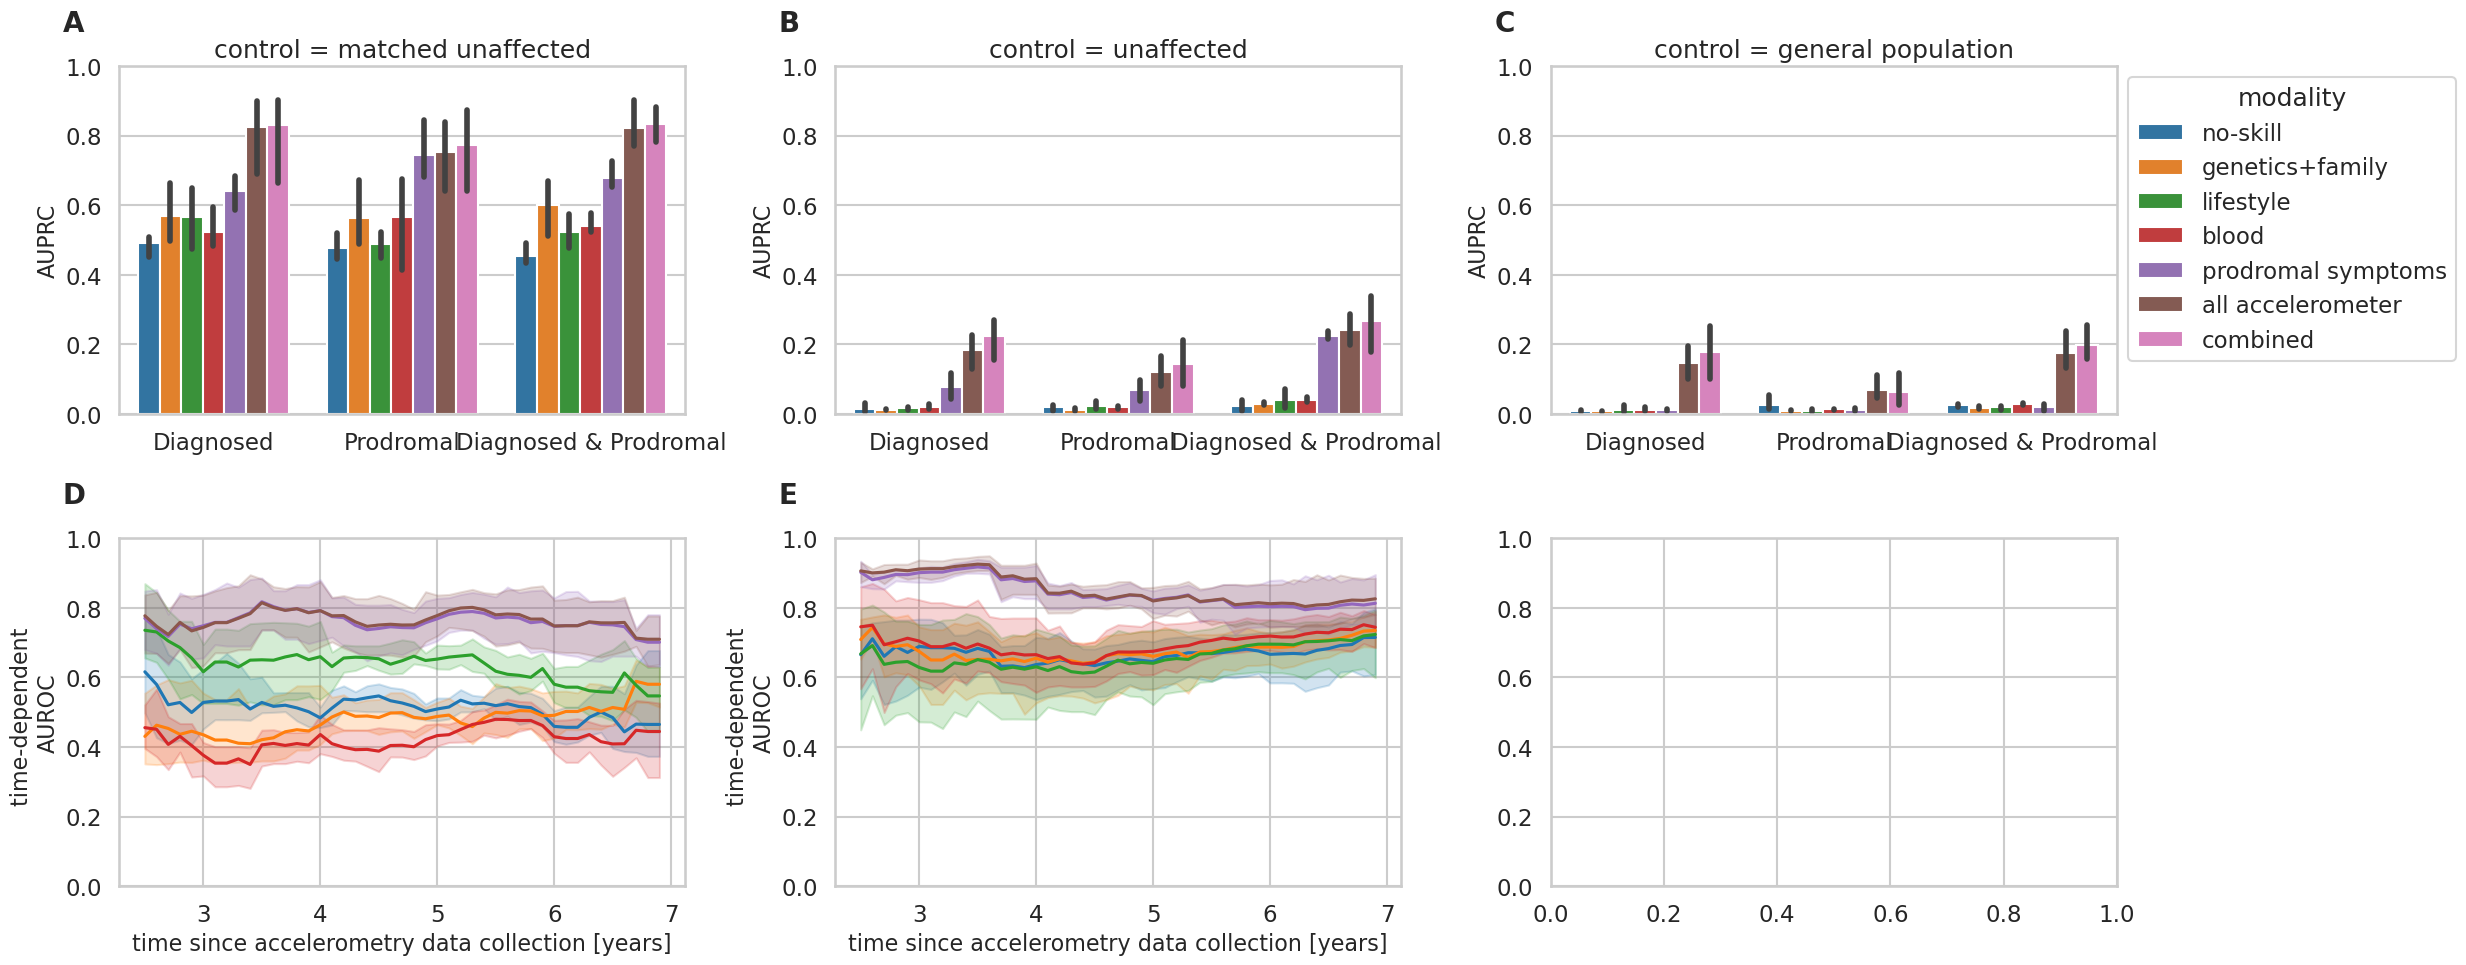

In [15]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(25,10))
plots.plot_context()
sns.set_style('whitegrid')

data_path = '/scratch/c.c21013066/data/ukbiobank/analyses/acc_models'
models = ['diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDallHC','diag_ProdallHC','diag_PDProdallHC','diag_PDPopulationNoProd','diag_ProdPopulationNoPD',
          'diag_PDProdPopulation']
kinds = ['HC','HC','HC','pop','pop','pop']
features = ['genetics+family','lifestyle_nofam','blood','prodromalsigns_beforePD','acc','all_acc_features',
            'all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD','stacked']

order = ['covariates','genetics+family','lifestyle_nofam','blood','prodromalsigns_beforePD','all_acc_features',
         'all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD']
labels = [['Diagnosed','Prodromal','Diagnosed & Prodromal'],
                         ['Diagnosed','Prodromal','Diagnosed & Prodromal'],['Diagnosed','Prodromal','Diagnosed & Prodromal']]
titles = ['control = matched unaffected','control = unaffected', 'control = general population']

subplotlabelsB = ['A','B','C']

for col,control,label,title in zip(np.arange(3),['[d|D]HC','allHC','Population'],labels,titles):
    r = re.compile(f'.*{control}.*')
    models_ = list(filter(r.match, models))
    performances_pr_ = performances_pr[performances_pr['model'].isin(models_)]
    print(models_)
    ax0 = sns.barplot(x='model',hue='features',y=0,data=performances_pr_[performances_pr_['features'].isin(order)],
                      ci=100-(0.05/len(order)),ax=axes[0,col],hue_order=order,order=models_)
    ax0.set_ylabel('AUPRC')
    if col==2:
        handles,_ = axes[0,col].get_legend_handles_labels()
        ax0.legend(bbox_to_anchor=(1,1),labels=['no-skill','genetics+family','lifestyle','blood','prodromal symptoms',
                                                'all accelerometer','combined'],#,'stacked'],
                  handles=handles,title='modality')
    else:
        ax0.legend([],[], frameon=False)
    ax0.set_xlabel('')
    ax0.set_xticklabels(label,rotation=0)
    ax0.set_title(title)
    ax0.set_ylim(0,1)
    ax0.text(-0.1, 1.1, subplotlabelsB[col], transform=ax0.transAxes, 
            size=20, weight='bold')

# survival models
fnames = ['genetics+family','lifestyle_nofam','blood','prodromalsigns_beforeacc','all_acc_features',
         'all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforeacc']
subplotlabelsC = ['D','E','F']
names = ['genetics+family','lifestyle','blood','prodromal signs','all accelerometer','combined']
aucss = []
meanss = []
for diag in ['','diag_ProdPopulationNoPD']:
    aucs = []
    means = pd.DataFrame(index=fnames,columns=['mean','ste'])
    for fi,fname in enumerate(fnames):
        # for population based model
        if diag == 'diag_ProdPopulationNoPD':
            cph_aucs = pd.read_csv(f'/scratch/c.c21013066/data/ukbiobank/analyses/survival/prodromal/{fname}/{diag}/rsf_aucs_5cv.csv')
        else:
            # for HC as controls
            cph_aucs = pd.read_csv(f'/scratch/c.c21013066/data/ukbiobank/analyses/survival/prodromal/{fname}/rsf_aucs_5cv.csv')
        auc = cph_aucs.iloc[:,2:].unstack().reset_index()
        auc['modality'] = fname
        auc['level_0'] = auc['level_0'].astype(float)
        aucs.append(auc)
        means.loc[fname,'mean'] = cph_aucs['mean'].mean()
        means.loc[fname,'std'] = cph_aucs['mean'].std()
        means.loc[fname,'ste'] = (cph_aucs['mean'].std())/np.sqrt(5)
    aucs = pd.concat(aucs)
    aucss.append(aucs)
    meanss.append(means)

for aucs,means,(col,plotlabel) in zip(aucss,meanss,enumerate(subplotlabelsC)):
    ax = sns.lineplot(x='level_0',y=0,data=aucs,ci=(100 - 0.05/len(names)),hue='modality',ax=axes[1,col])
    ax.set_xlabel('time since accelerometry data collection [years]')
    ax.set_ylabel('time-dependent \nAUROC')
    ax.set_ylim([0,1])
    ax.text(-0.1, 1.1,plotlabel, transform=ax.transAxes, 
            size=20, weight='bold')
    labels = []
    for fi,fname in enumerate(fnames):
        mean = means.loc[fname,'mean']
        ste = means.loc[fname,'ste']
        labels.append(f'{names[fi]}: {mean:.2f} ({ste:.2f})')
    if plotlabel=='F':
        ax.set_ylim([0.5,1])

    ax.legend([],[],frameon=False)#labels=labels,bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig(f'{image_path}/Fig5.pdf',bbox_inches='tight',dpi=300)
#plt.savefig(f'{image_path}/Fig5.png',bbox_inches='tight',dpi=300)